# Árvore de Decisão

A Árvore de Decisão é um modelo de aprendizado supervisionado usado tanto para classificação quanto para regressão. Ela funciona criando um conjunto de regras de decisão no formato de uma estrutura de árvore.

**Principais Vantagens:**
- **Interpretabilidade**: A maior vantagem é que o modelo é fácil de entender e visualizar. As regras de decisão são explícitas.
- **Pouco pré-processamento**: Não requer normalização ou padronização de dados.

**Principal Desvantagem:**
- **Overfitting**: Árvores de decisão podem facilmente se tornar muito complexas e se ajustar demais aos dados de treinamento, perdendo a capacidade de generalizar para novos dados. Técnicas como a "poda" (*pruning*) são usadas para mitigar isso.

Usaremos o famoso dataset **Iris** para este exemplo.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Carregando o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Criando e treinando o modelo de Árvore de Decisão
# `max_depth` é um hiperparâmetro para evitar overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
# Fazendo predições e avaliando
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

Acurácia do modelo: 1.0000


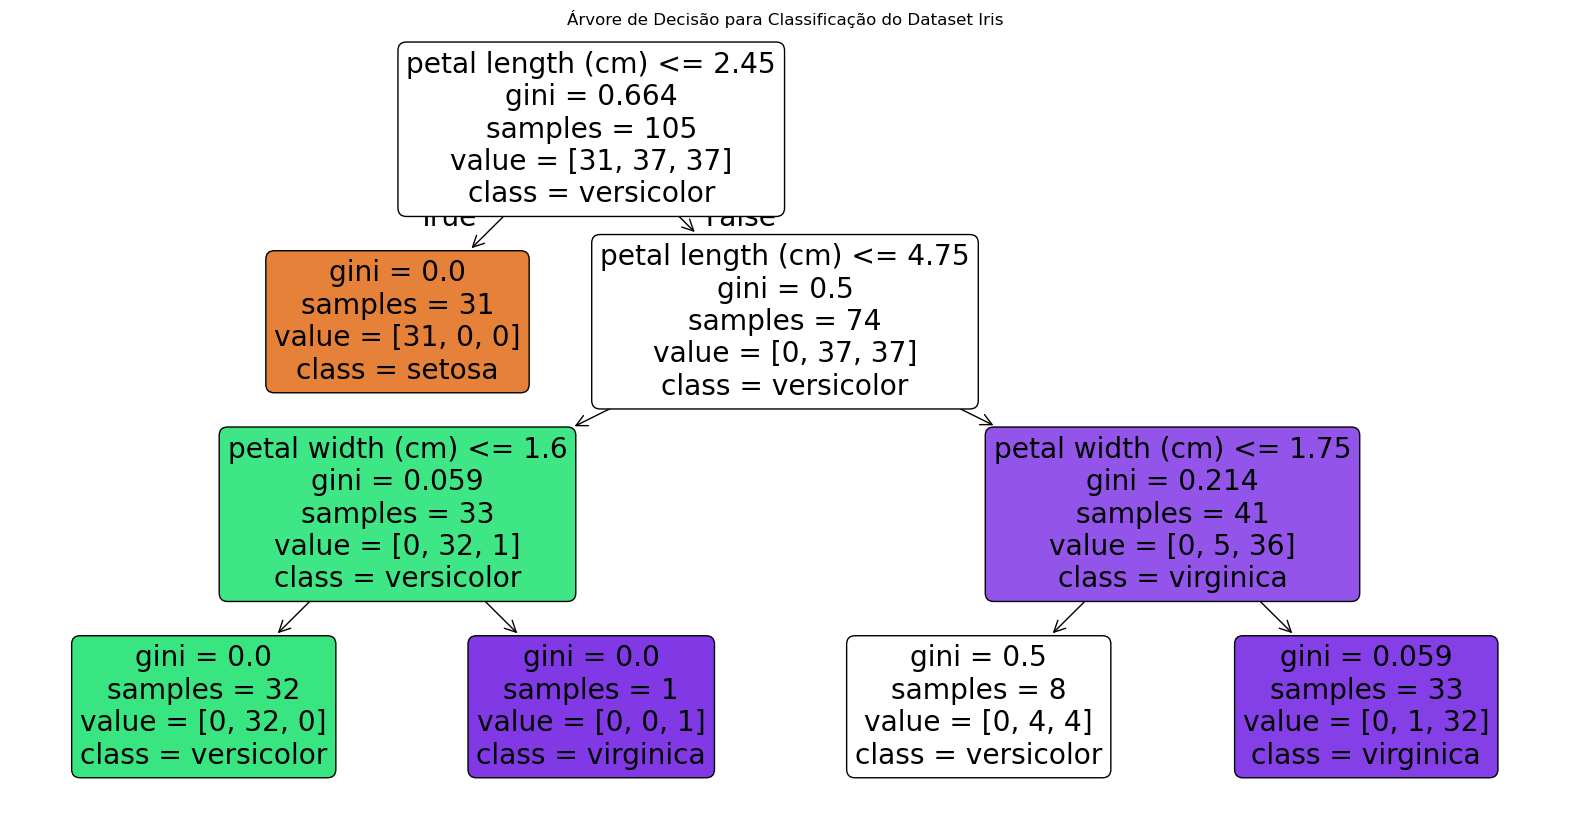

In [5]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True, 
          rounded=True)
plt.title('Árvore de Decisão para Classificação do Dataset Iris')
plt.show()

### Interpretando a Árvore

- Cada nó contém uma condição (ex: `petal width (cm) <= 0.8`).
- Se a condição for verdadeira, seguimos para o ramo da esquerda; caso contrário, para o da direita.
- O `gini` representa a impureza do nó (0 significa que todos os exemplos no nó pertencem à mesma classe).
- `samples` é o número de amostras de treinamento no nó.
- `value` mostra a distribuição das amostras entre as classes.
- `class` é a classe predita para as amostras que chegam a esse nó.